## Checking if the closing prices of these tech companies (Amazon, Apple, Google and Microsoft) are correalted or not ..?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings 
from warnings import filterwarningsrnings
filterwarnings('ignore')

In [4]:
company_list = [r'D:\\Python\\Project2\\individual_stocks_5yr\\AAPL_data.csv',
                r'D:\\Python\\Project2\\individual_stocks_5yr\\AMZN_data.csv',
                r'D:\\Python\\Project2\\individual_stocks_5yr\\GOOGL_data.csv',
                r'D:\\Python\\Project2\\individual_stocks_5yr\\MSFT_data.csv']

In [5]:
dataset = pd.DataFrame()

for file in company_list:
    dataset1 = pd.read_csv(file)
    dataset = pd.concat([dataset1,dataset], ignore_index=True)

In [6]:
dataset

,date,open,high,low,close,volume,Name
0,2013-02-08,27.350,27.71,27.3100,27.55,33318306,MSFT
1,2013-02-11,27.650,27.92,27.5000,27.86,32247549,MSFT
2,2013-02-12,27.880,28.00,27.7500,27.88,35990829,MSFT
3,2013-02-13,27.930,28.11,27.8800,28.03,41715530,MSFT
4,2013-02-14,27.920,28.06,27.8700,28.04,32663174,MSFT
...,...,...,...,...,...,...,...
5031,2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL
5032,2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL
5033,2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL
5034,2018-02-06,154.830,163.72,154.0000,163.03,68243838,AAPL


In [7]:
company_list

['D:\\\\Python\\\\Project2\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'D:\\\\Python\\\\Project2\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'D:\\\\Python\\\\Project2\\\\individual_stocks_5yr\\\\GOOGL_data.csv',
 'D:\\\\Python\\\\Project2\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [8]:
company_list[0]

'D:\\\\Python\\\\Project2\\\\individual_stocks_5yr\\\\AAPL_data.csv'

In [9]:
app = pd.read_csv(company_list[0])
amz = pd.read_csv(company_list[1])
goo = pd.read_csv(company_list[2])
mst = pd.read_csv(company_list[3])

In [11]:
closing_price = pd.DataFrame()

In [10]:
app['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [12]:
closing_price['Apple_close'] = app['close']
closing_price['Amazon_close'] = amz['close']
closing_price['Google_close'] = goo['close']
closing_price['Microsoft_close'] = mst['close']

In [13]:
closing_price

,Apple_close,Amazon_close,Google_close,Microsoft_close
0,67.8542,261.95,393.0777,27.55
1,68.5614,257.21,391.6012,27.86
2,66.8428,258.70,390.7403,27.88
3,66.7156,269.47,391.8214,28.03
4,66.6556,269.24,394.3039,28.04
...,...,...,...,...
1254,167.7800,1390.00,1181.5900,94.26
1255,160.5000,1429.95,1119.2000,91.78
1256,156.4900,1390.00,1062.3900,88.00
1257,163.0300,1442.84,1084.4300,91.33


In [15]:
# sns.pairplot?

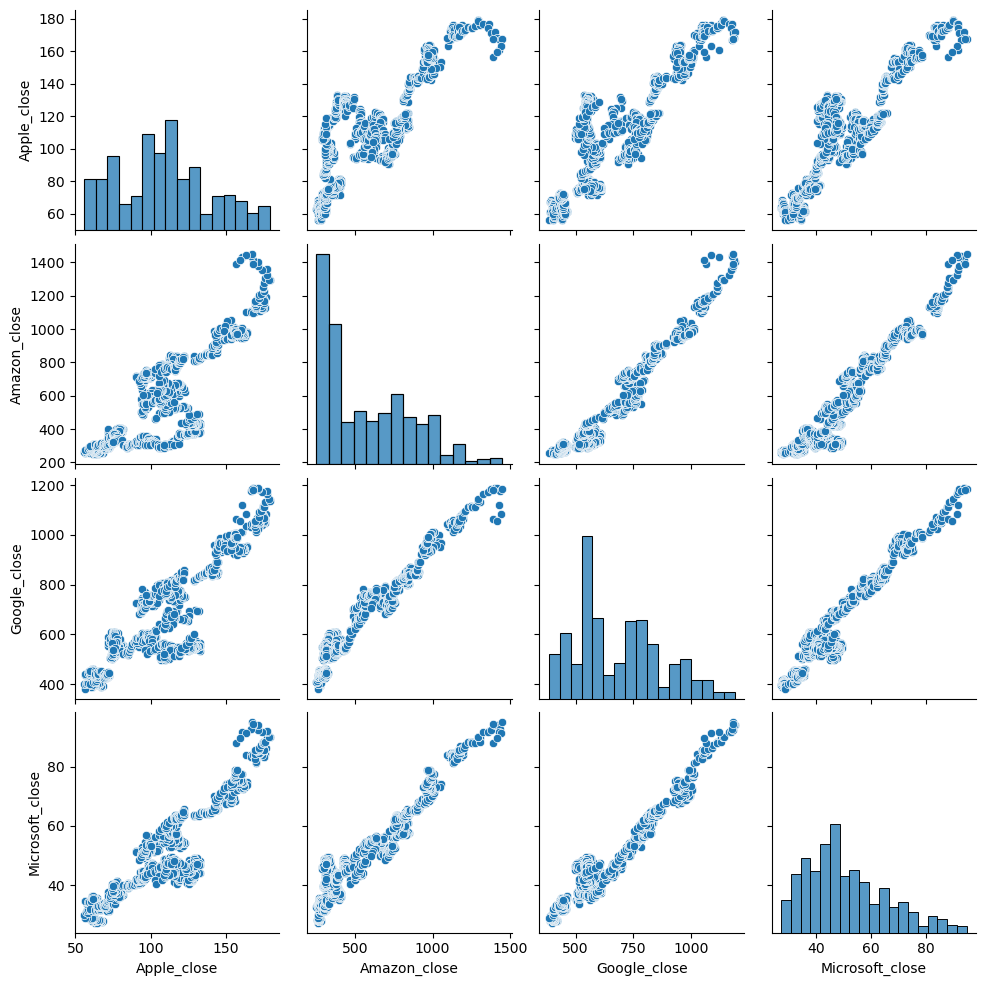

In [16]:
sns.pairplot(closing_price)

In [ ]:
# from the above plot we can see that Amazon and Google have almost straight scatter plots i.e they have a higher co-relation
# Similarly in case of microsoft and Google 
# which means if the closing price of Amazon increases the closing price of Google also increases

In [17]:
closing_price.corr()

,Apple_close,Amazon_close,Google_close,Microsoft_close
Apple_close,1.000000,0.819078,0.843736,0.899689
Amazon_close,0.819078,1.000000,0.973988,0.955977
Google_close,0.843736,0.973988,1.000000,0.970779
Microsoft_close,0.899689,0.955977,0.970779,1.000000


<Axes: >

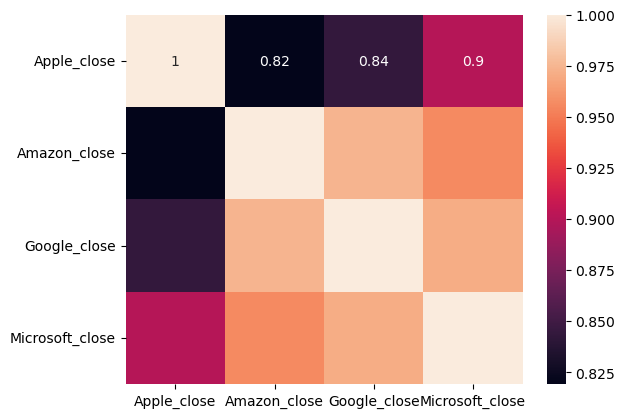

In [19]:
sns.heatmap(closing_price.corr(), annot=True)

## analyze weather the daily change in closing price of stocks or Daily returns in stocks are co-related or not ..?

In [20]:
closing_price

,Apple_close,Amazon_close,Google_close,Microsoft_close
0,67.8542,261.95,393.0777,27.55
1,68.5614,257.21,391.6012,27.86
2,66.8428,258.70,390.7403,27.88
3,66.7156,269.47,391.8214,28.03
4,66.6556,269.24,394.3039,28.04
...,...,...,...,...
1254,167.7800,1390.00,1181.5900,94.26
1255,160.5000,1429.95,1119.2000,91.78
1256,156.4900,1390.00,1062.3900,88.00
1257,163.0300,1442.84,1084.4300,91.33


In [21]:
(closing_price['Apple_close'] - closing_price['Apple_close'].shift(1)/closing_price['Apple_close'].shift(1))*100

0            NaN
1        6756.14
2        6584.28
3        6571.56
4        6565.56
          ...   
1254    16678.00
1255    15950.00
1256    15549.00
1257    16203.00
1258    15854.00
Name: Apple_close, Length: 1259, dtype: float64

In [22]:
for col in closing_price:
    closing_price[col + '_pct_change'] = (closing_price[col] - closing_price[col].shift(1)/closing_price[col].shift(1))*100

In [23]:
closing_price

,Apple_close,Amazon_close,Google_close,Microsoft_close,Apple_close_pct_change,Amazon_close_pct_change,Google_close_pct_change,Microsoft_close_pct_change
0,67.8542,261.95,393.0777,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,391.6012,27.86,6756.14,25621.0,39060.12,2686.0
2,66.8428,258.70,390.7403,27.88,6584.28,25770.0,38974.03,2688.0
3,66.7156,269.47,391.8214,28.03,6571.56,26847.0,39082.14,2703.0
4,66.6556,269.24,394.3039,28.04,6565.56,26824.0,39330.39,2704.0
...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,1181.5900,94.26,16678.00,138900.0,118059.00,9326.0
1255,160.5000,1429.95,1119.2000,91.78,15950.00,142895.0,111820.00,9078.0
1256,156.4900,1390.00,1062.3900,88.00,15549.00,138900.0,106139.00,8700.0
1257,163.0300,1442.84,1084.4300,91.33,16203.00,144184.0,108343.00,9033.0


In [27]:
closing_price.columns

Index(['Apple_close', 'Amazon_close', 'Google_close', 'Microsoft_close',
       'Apple_close_pct_change', 'Amazon_close_pct_change',
       'Google_close_pct_change', 'Microsoft_close_pct_change'],
      dtype='object')

In [28]:
closing_p = closing_price[['Apple_close_pct_change', 'Amazon_close_pct_change',
       'Google_close_pct_change', 'Microsoft_close_pct_change']]

In [29]:
closing_p

,Apple_close_pct_change,Amazon_close_pct_change,Google_close_pct_change,Microsoft_close_pct_change
0,NaN,NaN,NaN,NaN
1,6756.14,25621.0,39060.12,2686.0
2,6584.28,25770.0,38974.03,2688.0
3,6571.56,26847.0,39082.14,2703.0
4,6565.56,26824.0,39330.39,2704.0
...,...,...,...,...
1254,16678.00,138900.0,118059.00,9326.0
1255,15950.00,142895.0,111820.00,9078.0
1256,15549.00,138900.0,106139.00,8700.0
1257,16203.00,144184.0,108343.00,9033.0


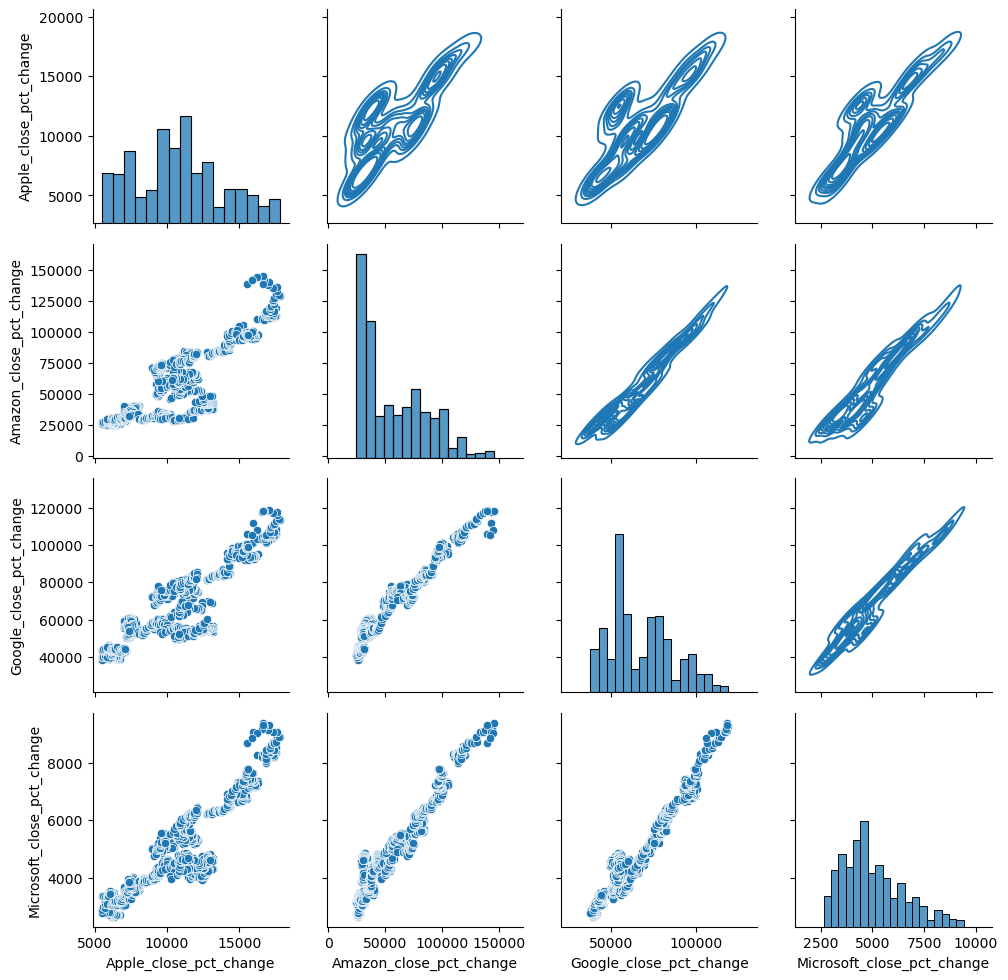

In [33]:
g= sns.PairGrid(data = closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [34]:
closing_p.corr()

,Apple_close_pct_change,Amazon_close_pct_change,Google_close_pct_change,Microsoft_close_pct_change
Apple_close_pct_change,1.000000,0.818880,0.843490,0.899538
Amazon_close_pct_change,0.818880,1.000000,0.974023,0.955999
Google_close_pct_change,0.843490,0.974023,1.000000,0.970723
Microsoft_close_pct_change,0.899538,0.955999,0.970723,1.000000
